In [164]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import statsmodels.formula.api as smf
from statsmodels.graphics.regressionplots import influence_plot

In [165]:
startups=pd.read_csv('50_Startups.csv')

In [166]:
startups.head()

,RD_spend,Administration,Marketing_spend,State,Profit
0,165349.20,136897.80,471784.10,New York,192261.83
1,162597.70,151377.59,443898.53,California,191792.06
2,153441.51,101145.55,407934.54,Florida,191050.39
3,144372.41,118671.85,383199.62,New York,182901.99
4,142107.34,91391.77,366168.42,Florida,166187.94


In [167]:
# Checking for Null values
startups.isnull().sum()

RD_spend           0
Administration     0
Marketing_spend    0
State              0
Profit             0
dtype: int64

In [168]:
startups.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 50 entries, 0 to 49
Data columns (total 5 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------  -----  
 0   RD_spend         50 non-null     float64
 1   Administration   50 non-null     float64
 2   Marketing_spend  50 non-null     float64
 3   State            50 non-null     object 
 4   Profit           50 non-null     float64
dtypes: float64(4), object(1)
memory usage: 2.1+ KB


In [169]:
startups.describe()

,RD_spend,Administration,Marketing_spend,Profit
count,50.000000,50.000000,50.000000,50.000000
mean,73721.615600,121344.639600,211025.097800,112012.639200
std,45902.256482,28017.802755,122290.310726,40306.180338
min,0.000000,51283.140000,0.000000,14681.400000
25%,39936.370000,103730.875000,129300.132500,90138.902500
50%,73051.080000,122699.795000,212716.240000,107978.190000
75%,101602.800000,144842.180000,299469.085000,139765.977500
max,165349.200000,182645.560000,471784.100000,192261.830000


In [170]:
startups.corr()

,RD_spend,Administration,Marketing_spend,Profit
RD_spend,1.000000,0.241955,0.724248,0.972900
Administration,0.241955,1.000000,-0.032154,0.200717
Marketing_spend,0.724248,-0.032154,1.000000,0.747766
Profit,0.972900,0.200717,0.747766,1.000000


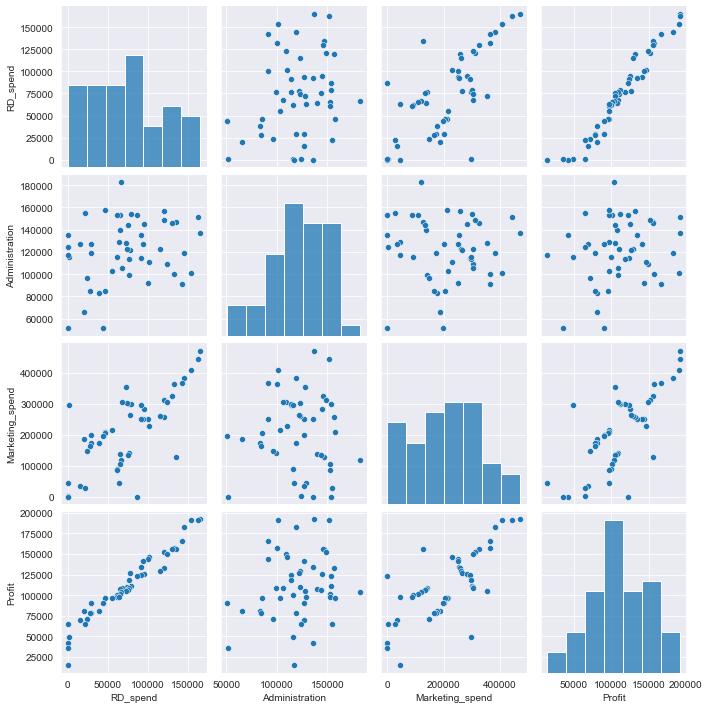

In [171]:
# Scatterplot along With Histogram For Various Variables
sns.set_style(style='darkgrid')
sns.pairplot(startups)

In [172]:
# Preparing Basic Model
import statsmodels.formula.api as smf
model=smf.ols('Profit~RD_spend+Administration+Marketing_spend',data=startups).fit()

In [173]:
model.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                 Profit   R-squared:                       0.951
Model:                            OLS   Adj. R-squared:                  0.948
Method:                 Least Squares   F-statistic:                     296.0
Date:                Fri, 24 Dec 2021   Prob (F-statistic):           4.53e-30
Time:                        21:01:56   Log-Likelihood:                -525.39
No. Observations:                  50   AIC:                             1059.
Df Residuals:                      46   BIC:                             1066.
Df Model:                           3                                         
Covariance Type:            nonrobust                                         
===================================================================================
                      coef    std err          t      P>|t|      [0.025      0.975]
-----------------------------------------------------------------------------------
Intercept        5.012e+04   6572.353      7.626      0.000    3.69e+04    6.34e+04
RD_spend            0.8057      0.045     17.846      0.000       0.715       0.897
Administration     -0.0268      0.051     -0.526      0.602      -0.130       0.076
Marketing_spend     0.0272      0.016      1.655      0.105      -0.006       0.060
==============================================================================
Omnibus:                       14.838   Durbin-Watson:                   1.282
Prob(Omnibus):                  0.001   Jarque-Bera (JB):               21.442
Skew:                          -0.949   Prob(JB):                     2.21e-05
Kurtosis:                       5.586   Cond. No.                     1.40e+06
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
[2] The condition number is large, 1.4e+06. This might indicate that there are
strong multicollinearity or other numerical problems.
"""

In [174]:
model.pvalues,'\n',model.tvalues

(Intercept          1.057379e-09
 RD_spend           2.634968e-22
 Administration     6.017551e-01
 Marketing_spend    1.047168e-01
 dtype: float64,
 '\n',
 Intercept           7.626218
 RD_spend           17.846374
 Administration     -0.525507
 Marketing_spend     1.655077
 dtype: float64)

In [175]:
# From P-values we can say that all columns have values <0.05 Except Administration Variable.It Has P-value>0.05 

In [176]:
model.rsquared

0.9507459940683246

In [177]:
model.rsquared_adj

0.9475337762901719

In [178]:
model_adm=smf.ols('Profit~Administration',data=startups).fit()
model_adm.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                 Profit   R-squared:                       0.040
Model:                            OLS   Adj. R-squared:                  0.020
Method:                 Least Squares   F-statistic:                     2.015
Date:                Fri, 24 Dec 2021   Prob (F-statistic):              0.162
Time:                        21:03:19   Log-Likelihood:                -599.63
No. Observations:                  50   AIC:                             1203.
Df Residuals:                      48   BIC:                             1207.
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
==================================================================================
                     coef    std err          t      P>|t|      [0.025      0.975]
----------------------------------------------------------------------------------
Intercept       7.697e+04   2.53e+04      3.040      0.004    2.61e+04    1.28e+05
Administration     0.2887      0.203      1.419      0.162      -0.120       0.698
==============================================================================
Omnibus:                        0.126   Durbin-Watson:                   0.099
Prob(Omnibus):                  0.939   Jarque-Bera (JB):                0.110
Skew:                           0.093   Prob(JB):                        0.947
Kurtosis:                       2.866   Cond. No.                     5.59e+05
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
[2] The condition number is large, 5.59e+05. This might indicate that there are
strong multicollinearity or other numerical problems.
"""

In [179]:
model_mark=smf.ols('Profit~Marketing_spend',data=startups).fit()
model_mark.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                 Profit   R-squared:                       0.559
Model:                            OLS   Adj. R-squared:                  0.550
Method:                 Least Squares   F-statistic:                     60.88
Date:                Fri, 24 Dec 2021   Prob (F-statistic):           4.38e-10
Time:                        21:04:08   Log-Likelihood:                -580.18
No. Observations:                  50   AIC:                             1164.
Df Residuals:                      48   BIC:                             1168.
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
===================================================================================
                      coef    std err          t      P>|t|      [0.025      0.975]
-----------------------------------------------------------------------------------
Intercept            6e+04   7684.530      7.808      0.000    4.46e+04    7.55e+04
Marketing_spend     0.2465      0.032      7.803      0.000       0.183       0.310
==============================================================================
Omnibus:                        4.420   Durbin-Watson:                   1.178
Prob(Omnibus):                  0.110   Jarque-Bera (JB):                3.882
Skew:                          -0.336   Prob(JB):                        0.144
Kurtosis:                       4.188   Cond. No.                     4.89e+05
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
[2] The condition number is large, 4.89e+05. This might indicate that there are
strong multicollinearity or other numerical problems.
"""

In [47]:
# There Is Problem With The P-value For Administration Variable

In [49]:
# Calculating VIF Values For Checking collinearities 

In [51]:
startups.head()

,RD_spend,Administration,Marketing_spend,State,Profit
0,165349.20,136897.80,471784.10,New York,192261.83
1,162597.70,151377.59,443898.53,California,191792.06
2,153441.51,101145.55,407934.54,Florida,191050.39
3,144372.41,118671.85,383199.62,New York,182901.99
4,142107.34,91391.77,366168.42,Florida,166187.94


In [57]:
#For RD_spend
rsq_rd=smf.ols('RD_spend~Administration+Marketing_spend',data=startups).fit().rsquared
vif_rd=1/(1-rsq_rd)

# For Administration
rsq_ad=smf.ols('Administration~RD_spend+Marketing_spend',data=startups).fit().rsquared
vif_ad=1/(1-rsq_ad)

#For Marketing_spend
rsq_mark=smf.ols('Marketing_spend~RD_spend+Administration',data=startups).fit().rsquared
vif_mark=1/(1-rsq_mark)

# Creating DataFrame

D1={'Variables':['RD_spend','Administration','Marketing_spend'],'VIF':[vif_rd,vif_ad,vif_mark]}
vif_frame=pd.DataFrame(D1)
vif_frame

,Variables,VIF
0,RD_spend,2.468903
1,Administration,1.175091
2,Marketing_spend,2.326773


In [58]:
## By Seeing VIF Values ALl Variables Have Values<20

# Residual Analysis

## Test For Normality Of Residuals(QQ-Plot)

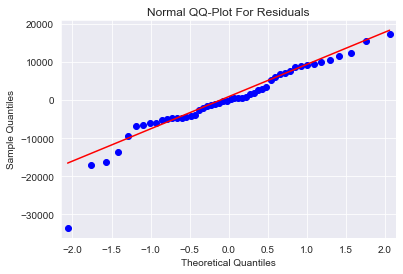

In [60]:
import statsmodels.api as sm
qqplot=sm.qqplot(model.resid,line='q')
plt.title('Normal QQ-Plot For Residuals')
plt.show()

In [61]:
## By Seeing QQ-PLot for Residuals Errors are Following Normal Distribution

# Residual Plot For Homoscedasticity

In [67]:
def get_standardized_values(vals):
    return(vals-vals.mean()/vals.std())



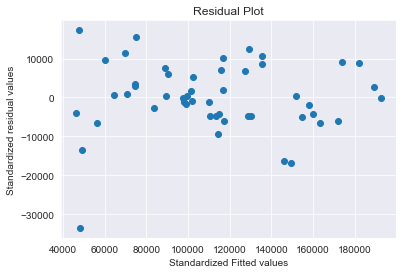

In [69]:
plt.scatter(get_standardized_values(model.fittedvalues),
            get_standardized_values(model.resid))

plt.title('Residual Plot')
plt.xlabel('Standardized Fitted values')
plt.ylabel('Standardized residual values')
plt.show()

In [70]:
# No Sharp Pattern Found In Residual Plot For Homoscedasticity 

# Residuals VS Regressors

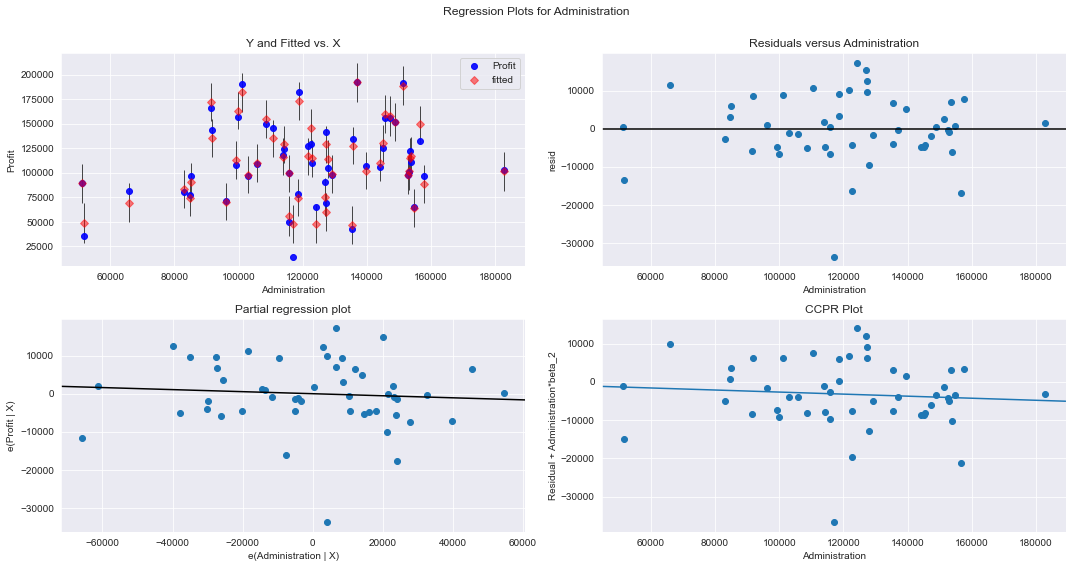

In [71]:
fig=plt.figure(figsize=(15,8))
fig=sm.graphics.plot_regress_exog(model,"Administration",fig=fig)
plt.show()

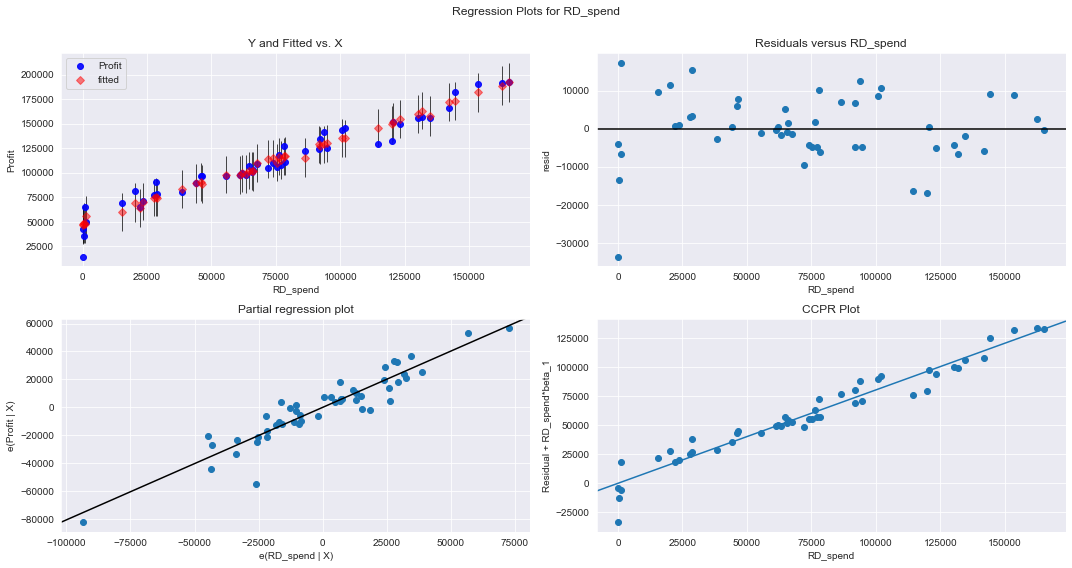

In [72]:
fig=plt.figure(figsize=(15,8))
fig=sm.graphics.plot_regress_exog(model,"RD_spend",fig=fig)
plt.show()

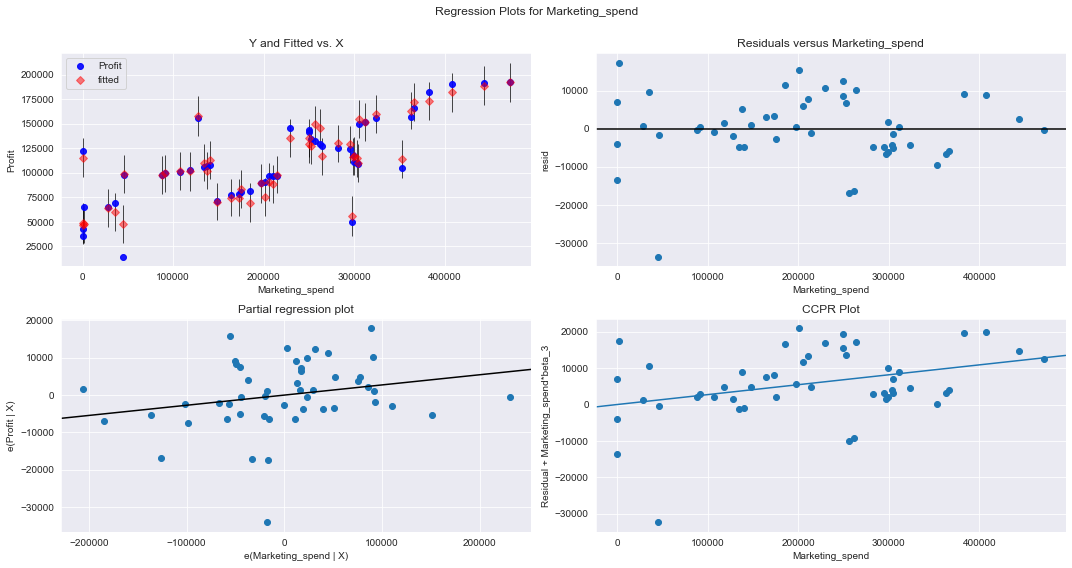

In [73]:
fig=plt.figure(figsize=(15,8))
fig=sm.graphics.plot_regress_exog(model,"Marketing_spend",fig=fig)
plt.show()

### Conclusion:-No Sharp Slope Line For Administration Compared To Other Variables

# Model Deletion Diagnosis:-

In [74]:
model_influence=model.get_influence()
(c,_)=model_influence.cooks_distance

In [75]:
c

array([3.21825244e-05, 3.27591036e-03, 3.23842699e-02, 2.17206555e-02,
       1.44833032e-02, 1.17158463e-02, 2.91766303e-03, 3.56513444e-03,
       4.04303948e-05, 4.86758017e-03, 1.51064757e-02, 1.63564959e-02,
       1.15516625e-02, 4.01422811e-03, 6.12934253e-02, 3.40013448e-02,
       8.33556413e-03, 3.30534399e-03, 2.16819303e-03, 4.07440577e-02,
       4.25137222e-04, 1.09844352e-02, 2.91768000e-03, 2.76030254e-04,
       5.04643588e-03, 3.00074623e-03, 3.41957068e-03, 2.98396413e-02,
       1.31590664e-03, 1.25992620e-04, 4.18505125e-05, 9.27434786e-06,
       7.08656521e-04, 1.28122674e-04, 2.09815032e-02, 6.69508674e-03,
       5.55314705e-02, 6.55050578e-05, 5.61547311e-02, 1.54279607e-03,
       1.84850929e-03, 1.97578066e-03, 1.36089280e-04, 2.05553171e-02,
       1.23156041e-04, 9.03234206e-02, 5.45303387e-02, 5.33885616e-03,
       1.90527441e-01, 2.88082293e-01])

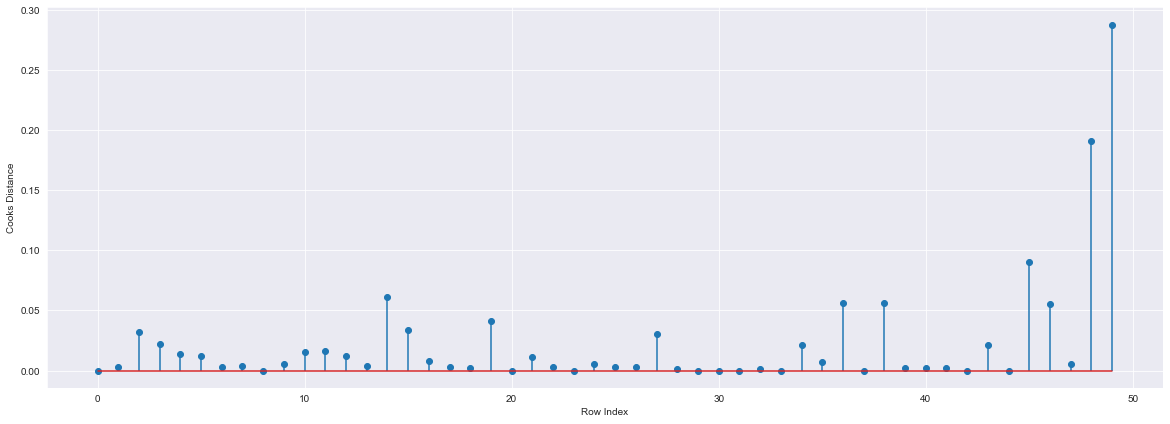

In [76]:
fig=plt.subplots(figsize=(20,7))
plt.stem(np.arange(len(startups)),np.round(c,3))
plt.xlabel('Row Index')
plt.ylabel('Cooks Distance')
plt.show()

In [77]:
np.argmax(c),np.max(c)

(49, 0.2880822927543263)

# High Influence Points

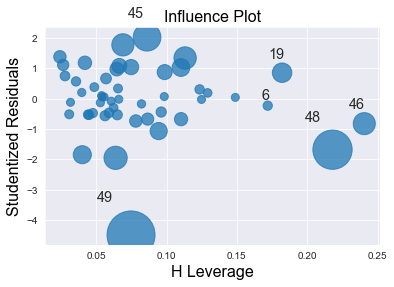

In [78]:
from statsmodels.graphics.regressionplots import influence_plot
influence_plot(model)
plt.show()

# Improving the Model

In [88]:
startups=pd.read_csv('50_Startups.csv')

In [89]:
startups_new=startups.drop(startups.index[[48,49]],axis=0).reset_index()

In [95]:
startups_new


,index,RD_spend,Administration,Marketing_spend,State,Profit
0,0,165349.20,136897.80,471784.10,New York,192261.83
1,1,162597.70,151377.59,443898.53,California,191792.06
2,2,153441.51,101145.55,407934.54,Florida,191050.39
3,3,144372.41,118671.85,383199.62,New York,182901.99
4,4,142107.34,91391.77,366168.42,Florida,166187.94
5,5,131876.90,99814.71,362861.36,New York,156991.12
6,6,134615.46,147198.87,127716.82,California,156122.51
7,7,130298.13,145530.06,323876.68,Florida,155752.60
8,8,120542.52,148718.95,311613.29,New York,152211.77
9,9,123334.88,108679.17,304981.62,California,149759.96


In [96]:
startups1=startups_new.drop(['index'],axis=1)

In [113]:
startups1

,RD_spend,Administration,Marketing_spend,State,Profit
0,165349.20,136897.80,471784.10,New York,192261.83
1,162597.70,151377.59,443898.53,California,191792.06
2,153441.51,101145.55,407934.54,Florida,191050.39
3,144372.41,118671.85,383199.62,New York,182901.99
4,142107.34,91391.77,366168.42,Florida,166187.94
5,131876.90,99814.71,362861.36,New York,156991.12
6,134615.46,147198.87,127716.82,California,156122.51
7,130298.13,145530.06,323876.68,Florida,155752.60
8,120542.52,148718.95,311613.29,New York,152211.77
9,123334.88,108679.17,304981.62,California,149759.96


# Building Our Final Model

In [99]:
final_ml_rdm=smf.ols('Profit~RD_spend+Marketing_spend',data=startups1).fit()

In [100]:
final_ml_rdm.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                 Profit   R-squared:                       0.961
Model:                            OLS   Adj. R-squared:                  0.959
Method:                 Least Squares   F-statistic:                     553.1
Date:                Fri, 24 Dec 2021   Prob (F-statistic):           2.09e-32
Time:                        12:30:14   Log-Likelihood:                -494.44
No. Observations:                  48   AIC:                             994.9
Df Residuals:                      45   BIC:                             1001.
Df Model:                           2                                         
Covariance Type:            nonrobust                                         
===================================================================================
                      coef    std err          t      P>|t|      [0.025      0.975]
-----------------------------------------------------------------------------------
Intercept        5.127e+04   2376.280     21.574      0.000    4.65e+04    5.61e+04
RD_spend            0.7695      0.034     22.636      0.000       0.701       0.838
Marketing_spend     0.0241      0.013      1.899      0.064      -0.001       0.050
==============================================================================
Omnibus:                        0.079   Durbin-Watson:                   1.603
Prob(Omnibus):                  0.961   Jarque-Bera (JB):                0.282
Skew:                           0.016   Prob(JB):                        0.868
Kurtosis:                       2.626   Cond. No.                     5.79e+05
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
[2] The condition number is large, 5.79e+05. This might indicate that there are
strong multicollinearity or other numerical problems.
"""

In [128]:
final_ml_rdm.rsquared,final_ml_rdm.aic

(0.9609119875752479, 994.886442942941)

In [101]:
final_ml_rda=smf.ols('Profit~RD_spend+Administration',data=startups1).fit()
final_ml_rda.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                 Profit   R-squared:                       0.961
Model:                            OLS   Adj. R-squared:                  0.960
Method:                 Least Squares   F-statistic:                     559.7
Date:                Fri, 24 Dec 2021   Prob (F-statistic):           1.62e-32
Time:                        12:32:38   Log-Likelihood:                -494.17
No. Observations:                  48   AIC:                             994.3
Df Residuals:                      45   BIC:                             1000.
Df Model:                           2                                         
Covariance Type:            nonrobust                                         
==================================================================================
                     coef    std err          t      P>|t|      [0.025      0.975]
----------------------------------------------------------------------------------
Intercept       6.273e+04   5182.210     12.106      0.000    5.23e+04    7.32e+04
RD_spend           0.8229      0.025     33.245      0.000       0.773       0.873
Administration    -0.0837      0.041     -2.041      0.047      -0.166      -0.001
==============================================================================
Omnibus:                        0.197   Durbin-Watson:                   1.780
Prob(Omnibus):                  0.906   Jarque-Bera (JB):                0.396
Skew:                           0.073   Prob(JB):                        0.820
Kurtosis:                       2.580   Cond. No.                     7.24e+05
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
[2] The condition number is large, 7.24e+05. This might indicate that there are
strong multicollinearity or other numerical problems.
"""

In [127]:
final_ml_rda.rsquared,final_ml_rda.aic

(0.9653589410274203, 969.380034098345)

####  By Comparing Both The  Model We Get To Know That final_ml_rdm= Profit~RD_spend+Marketing_spend Have Less R^2 value And High AIC valueCompared To Other Model So We Go For  final_ml_rda= Profit~RD_spend+Administration

In [104]:
model_influence_rda=final_ml_rda.get_influence()
(c_rda,_)=model_influence_rda.cooks_distance

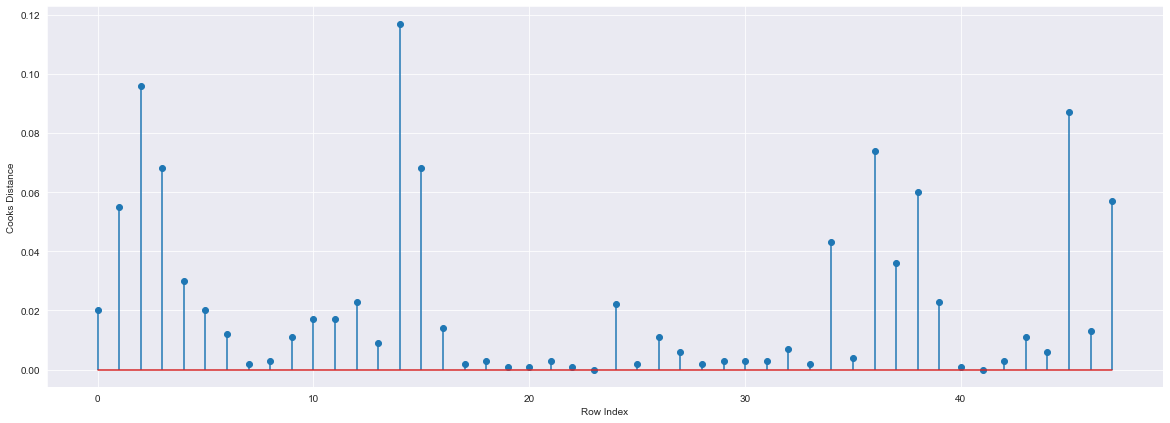

In [105]:
fig=plt.subplots(figsize=(20,7))
plt.stem(np.arange(len(startups1)),np.round(c_rda,3))
plt.xlabel('Row Index')
plt.ylabel('Cooks Distance')
plt.show()

In [106]:
np.argmax(c_rda),np.max(c_rda)

(14, 0.11654464976722198)

In [119]:
startups2=startups1.drop(startups1.index[[14]],axis=0).reset_index()

In [120]:
startups2

,index,RD_spend,Administration,Marketing_spend,State,Profit
0,0,165349.20,136897.80,471784.10,New York,192261.83
1,1,162597.70,151377.59,443898.53,California,191792.06
2,2,153441.51,101145.55,407934.54,Florida,191050.39
3,3,144372.41,118671.85,383199.62,New York,182901.99
4,4,142107.34,91391.77,366168.42,Florida,166187.94
5,5,131876.90,99814.71,362861.36,New York,156991.12
6,6,134615.46,147198.87,127716.82,California,156122.51
7,7,130298.13,145530.06,323876.68,Florida,155752.60
8,8,120542.52,148718.95,311613.29,New York,152211.77
9,9,123334.88,108679.17,304981.62,California,149759.96


In [121]:
startups3=startups2.drop(['index'],axis=1)

In [122]:
startups3

,RD_spend,Administration,Marketing_spend,State,Profit
0,165349.20,136897.80,471784.10,New York,192261.83
1,162597.70,151377.59,443898.53,California,191792.06
2,153441.51,101145.55,407934.54,Florida,191050.39
3,144372.41,118671.85,383199.62,New York,182901.99
4,142107.34,91391.77,366168.42,Florida,166187.94
5,131876.90,99814.71,362861.36,New York,156991.12
6,134615.46,147198.87,127716.82,California,156122.51
7,130298.13,145530.06,323876.68,Florida,155752.60
8,120542.52,148718.95,311613.29,New York,152211.77
9,123334.88,108679.17,304981.62,California,149759.96


# Building Our Final Model

In [123]:
final_ml_rda=smf.ols('Profit~RD_spend+Administration',data=startups3).fit()
final_ml_rda.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                 Profit   R-squared:                       0.965
Model:                            OLS   Adj. R-squared:                  0.964
Method:                 Least Squares   F-statistic:                     613.1
Date:                Fri, 24 Dec 2021   Prob (F-statistic):           7.43e-33
Time:                        13:03:48   Log-Likelihood:                -481.69
No. Observations:                  47   AIC:                             969.4
Df Residuals:                      44   BIC:                             974.9
Df Model:                           2                                         
Covariance Type:            nonrobust                                         
==================================================================================
                     coef    std err          t      P>|t|      [0.025      0.975]
----------------------------------------------------------------------------------
Intercept       6.074e+04   5025.361     12.087      0.000    5.06e+04    7.09e+04
RD_spend           0.8292      0.024     34.836      0.000       0.781       0.877
Administration    -0.0686      0.040     -1.726      0.091      -0.149       0.011
==============================================================================
Omnibus:                        0.529   Durbin-Watson:                   1.976
Prob(Omnibus):                  0.767   Jarque-Bera (JB):                0.666
Skew:                           0.197   Prob(JB):                        0.717
Kurtosis:                       2.569   Cond. No.                     7.22e+05
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
[2] The condition number is large, 7.22e+05. This might indicate that there are
strong multicollinearity or other numerical problems.
"""

In [129]:
model_influence_rda_1=final_ml_rda.get_influence()
(c_rda_1,_)=model_influence_rda_1.cooks_distance

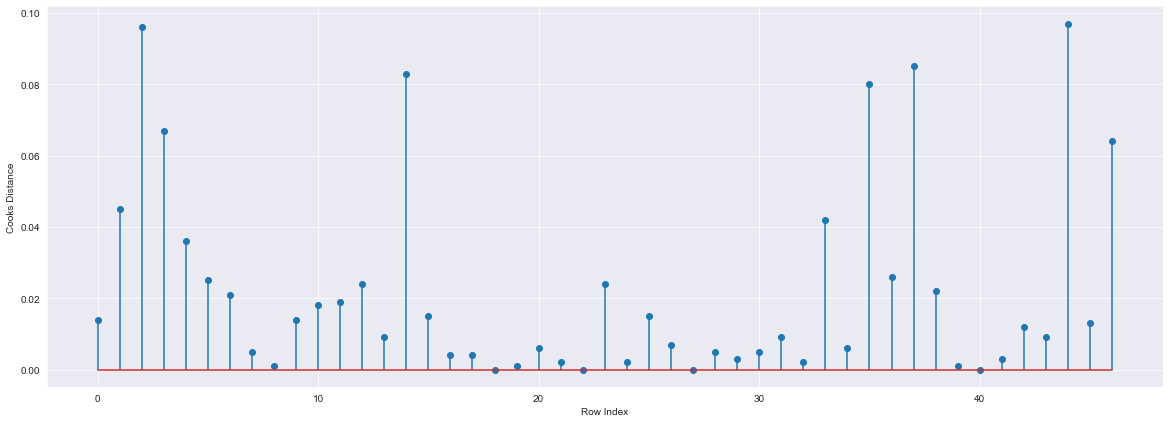

In [130]:
fig=plt.subplots(figsize=(20,7))
plt.stem(np.arange(len(startups3)),np.round(c_rda_1,3))
plt.xlabel('Row Index')
plt.ylabel('Cooks Distance')
plt.show()

In [131]:
np.argmax(c_rda_1),np.max(c_rda_1)

(44, 0.09678650589187422)

In [138]:
startups3_new=startups3.drop(startups3.index[[44]],axis=0).reset_index()

In [139]:
startups3_new


,index,RD_spend,Administration,Marketing_spend,State,Profit
0,0,165349.20,136897.80,471784.10,New York,192261.83
1,1,162597.70,151377.59,443898.53,California,191792.06
2,2,153441.51,101145.55,407934.54,Florida,191050.39
3,3,144372.41,118671.85,383199.62,New York,182901.99
4,4,142107.34,91391.77,366168.42,Florida,166187.94
5,5,131876.90,99814.71,362861.36,New York,156991.12
6,6,134615.46,147198.87,127716.82,California,156122.51
7,7,130298.13,145530.06,323876.68,Florida,155752.60
8,8,120542.52,148718.95,311613.29,New York,152211.77
9,9,123334.88,108679.17,304981.62,California,149759.96


In [140]:
startups4=startups3_new.drop(['index'],axis=1)

In [141]:
startups4

,RD_spend,Administration,Marketing_spend,State,Profit
0,165349.20,136897.80,471784.10,New York,192261.83
1,162597.70,151377.59,443898.53,California,191792.06
2,153441.51,101145.55,407934.54,Florida,191050.39
3,144372.41,118671.85,383199.62,New York,182901.99
4,142107.34,91391.77,366168.42,Florida,166187.94
5,131876.90,99814.71,362861.36,New York,156991.12
6,134615.46,147198.87,127716.82,California,156122.51
7,130298.13,145530.06,323876.68,Florida,155752.60
8,120542.52,148718.95,311613.29,New York,152211.77
9,123334.88,108679.17,304981.62,California,149759.96


# Final Model For prediction

In [142]:
final_ml_rda_1=smf.ols('Profit~RD_spend+Administration',data=startups4).fit()
final_ml_rda_1.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                 Profit   R-squared:                       0.966
Model:                            OLS   Adj. R-squared:                  0.965
Method:                 Least Squares   F-statistic:                     618.8
Date:                Fri, 24 Dec 2021   Prob (F-statistic):           2.05e-32
Time:                        17:12:43   Log-Likelihood:                -470.26
No. Observations:                  46   AIC:                             946.5
Df Residuals:                      43   BIC:                             952.0
Df Model:                           2                                         
Covariance Type:            nonrobust                                         
==================================================================================
                     coef    std err          t      P>|t|      [0.025      0.975]
----------------------------------------------------------------------------------
Intercept       6.006e+04   4916.248     12.216      0.000    5.01e+04       7e+04
RD_spend           0.8404      0.024     34.980      0.000       0.792       0.889
Administration    -0.0722      0.039     -1.860      0.070      -0.150       0.006
==============================================================================
Omnibus:                        0.297   Durbin-Watson:                   1.944
Prob(Omnibus):                  0.862   Jarque-Bera (JB):                0.293
Skew:                           0.172   Prob(JB):                        0.864
Kurtosis:                       2.814   Cond. No.                     7.20e+05
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
[2] The condition number is large, 7.2e+05. This might indicate that there are
strong multicollinearity or other numerical problems.
"""

# Prediction For a New Data

In [156]:
new_data=pd.DataFrame({'RD_spend':165559,"Administration":151568,"Marketing_spend":443848},index=[1])

In [157]:
final_ml_rda_1.predict(new_data)

1    188247.232904
dtype: float64

In [160]:
final_ml_rda_1.predict(startups4.iloc[0:5,])

0    189129.851922
1    185772.430690
2    181703.824629
3    172817.466474
4    172883.134401
dtype: float64

In [162]:
pred_y = final_ml_rda_1.predict(startups4)

In [163]:
pred_y

0     189129.851922
1     185772.430690
2     181703.824629
3     172817.466474
4     172883.134401
5     163677.936703
6     162559.014424
7     159051.378183
8     150623.011430
9     155859.743150
10    137719.579284
11    138033.872528
12    129747.938870
13    127585.263928
14    147449.088818
15    116840.843297
16    129132.933937
17    128919.734344
18    121601.568109
19    115920.432508
20    114834.597388
21    113378.280229
22    109177.259318
23    117637.284951
24    104327.360953
25    112958.254923
26    111425.747001
27    102382.275580
28    104145.007531
29    103809.426497
30    100413.202450
31    104017.897045
32     99254.990987
33     87690.971265
34     92588.477421
35     74975.800368
36     93391.944206
37     72299.017943
38     86472.275679
39     75666.192565
40     77384.602729
41     72982.849033
42     63894.832234
43     67522.186154
44     52804.817384
45     50283.820534
dtype: float64